In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

from ktnas.read_data import read_microwave1


In [2]:
import os
while '/analysis' in os.getcwd():
    os.chdir('..')

os.getcwd()

'/home/felix/kt_nas'

In [3]:
df = read_microwave1()
df.head()

,ticket_hist_id,seq,alarm_list,level_list,weather_list,label,insert_dt,update_dt,trainig_yn,effect_dt
0,2074513,0,"[""Radio loss of frame"", ""Radio loss of frame"",...","[-49.0, -49.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
1,2074513,1,"[""Radio loss of frame"", ""Local radio loss of f...","[-49.0, -49.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
2,2074513,2,"[""Local radio loss of frame"", ""Radio loss of f...","[-49.0, -40.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
3,2074513,3,"[""Radio loss of frame"", ""Radio loss of frame"",...","[-49.0, -40.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
4,2074513,4,"[""Radio loss of frame"", ""Local radio loss of f...","[-49.0, -39.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429


In [4]:
df_small = df.loc[df['seq'] == 0]
df.head()

,ticket_hist_id,seq,alarm_list,level_list,weather_list,label,insert_dt,update_dt,trainig_yn,effect_dt
0,2074513,0,"[""Radio loss of frame"", ""Radio loss of frame"",...","[-49.0, -49.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
1,2074513,1,"[""Radio loss of frame"", ""Local radio loss of f...","[-49.0, -49.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
2,2074513,2,"[""Local radio loss of frame"", ""Radio loss of f...","[-49.0, -40.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
3,2074513,3,"[""Radio loss of frame"", ""Radio loss of frame"",...","[-49.0, -40.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
4,2074513,4,"[""Radio loss of frame"", ""Local radio loss of f...","[-49.0, -39.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429


The full dataset is super big

In [5]:
df.shape[0]

101776

But the dataset with seq==0 is small

In [6]:
df_small.shape[0]

675

Labels are skewed: many invalid alarms(1), very few valid(2) and external(3)

<AxesSubplot:>

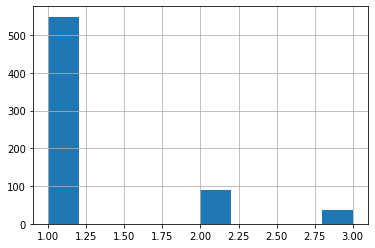

In [7]:
df_small['label'].hist()

In [8]:
for index, value in df_small['alarm_list'].items():
    array = json.loads(value)
    array = list(set(array))
    array = json.dumps(array)
    df_small['alarm_list'][index] = array

df_small.head()

/tmp/ipykernel_14253/3428462691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['alarm_list'][index] = array


,ticket_hist_id,seq,alarm_list,level_list,weather_list,label,insert_dt,update_dt,trainig_yn,effect_dt
0,2074513,0,"[""Radio loss of frame"", ""Local radio loss of f...","[-49.0, -49.0]","[0.0, 0.0, 0.0, 0.1473684210526316, 0.14736842...",1,20201202185320,20201203110754,Y,20200701003429
5,2074520,0,"[""Receive path has been lost"", ""The pseudowire...","[-46.7000007629395, -43.9000015258789]","[0.0, 0.0, 0.0, 0.0, 0.22033898305084745, 0.0,...",1,20201202185320,20201203110754,Y,20200701060534
52,2074533,0,"[""Radio loss of frame"", ""Radio excessive BER""]","[-81.0, -56.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.052380952380...",1,20201202185320,20201203110754,Y,20200701102158
57,2074534,0,"[""AIS-INSERT"", ""EMPTY""]","[-44.5, -43.0999984741211]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.916666666666...",1,20201202185320,20201203110754,Y,20200701102335
58,2074541,0,"[""Radio loss of frame"", ""Local radio loss of f...","[-81.0, -51.0]","[0.7, 2.033333333333333, 2.3, 2.3, 2.3, 0.0, 2...",1,20201202185320,20201203110754,Y,20200701111901


In [9]:
# List of all unique alarm list errors
alarm_list_texts = []
for index, value in df_small['alarm_list'].items():
    alarm_list_texts += json.loads(value)

alarm_list_texts = list(set(alarm_list_texts))
len(alarm_list_texts)
    

68

The alarm list is quite varied, with EMPTY the most common one.
Problem is of course that every alarm has multiple alarm list texts

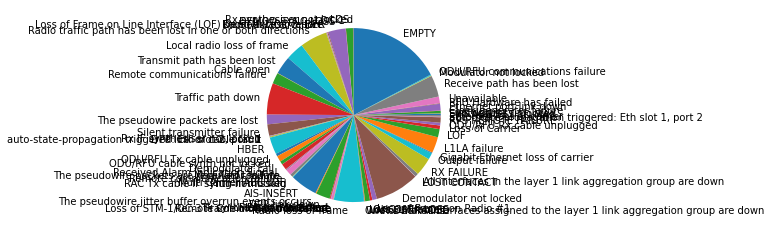

In [10]:
alarm_list_count = [0] * len(alarm_list_texts)
for _, value in df_small['alarm_list'].items():
    array = json.loads(value)
    for alarm_text in array:
        index = alarm_list_texts.index(alarm_text)
        alarm_list_count[index] += 1

plt.pie(x=alarm_list_count, labels=alarm_list_texts)
plt.show()

Except for the alarm list and the level list, all other columns are the same over all seq.

In [11]:
df.groupby('ticket_hist_id').nunique().max()

seq             986
alarm_list      986
level_list      198
weather_list      1
label             1
insert_dt         1
update_dt         1
trainig_yn        1
effect_dt         1
dtype: int64

Proposed data change:
- log(#seq)
- One-hot encoding alarm list, aggregating all alarms over the seqs
- Overall min / max of level_list 
- Weather list as it is

However, there are only 675 data points ....
-> Useless data set
